In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('prime.csv') #dataset reading

In [3]:
df.head(5) #top 5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

<div class="alert alert-info">The dataset contains 8807 rows and 12 features</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<Axes: >

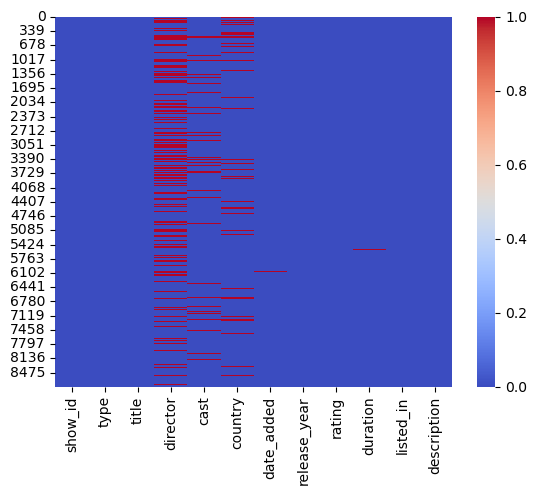

In [6]:
sns.heatmap(df.isnull(),cmap='coolwarm')  #checking null values

<div class="alert alert-info">The dataset contains null values in the feature 'director','cast','country' and in 'duration'</div>

In [7]:
#percentage of null values in each columns
null_col=['director','cast','country','duration']
for i in null_col:
    count=(df[i].isnull().sum()/len(df))*100
    print("Percentage of null values in {} column: {}".format(i,count))
    

Percentage of null values in director column: 29.908027705234474
Percentage of null values in cast column: 9.367548540933349
Percentage of null values in country column: 9.435676166685592
Percentage of null values in duration column: 0.034063812876121265


<div class="alert alert-info">The director column contains 29% null values and cast and the country columns contains 9% null values</div>

In [8]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [9]:
#finding the class percentage of Movie and TVshow
type_df=df['type'].value_counts().reset_index()
type_df

,index,type
0,Movie,6131
1,TV Show,2676


Text(0.5, 1.0, 'Precentage of Movies and TV shows present in the amozon prime')

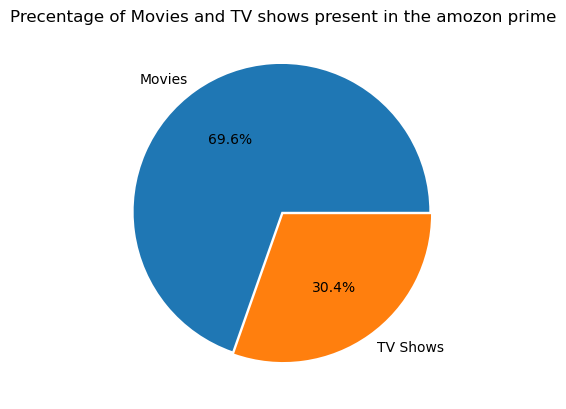

In [10]:
label=['Movies','TV Shows']
autopct = '%1.1f%%'
explode=[0.02,0]
plt.pie(type_df['type'],labels=label,autopct=autopct,explode=explode)
plt.title("Precentage of Movies and TV shows present in the amozon prime")

<div class="alert alert-info">We can see that the amazon prime mostly focus on the Movies compared to TV Shows in theri Website</div>

In [11]:

from datetime import datetime
df['date'] = pd.to_datetime(df['date_added'])

In [12]:
df['added_year'] = df['date'].dt.year
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0


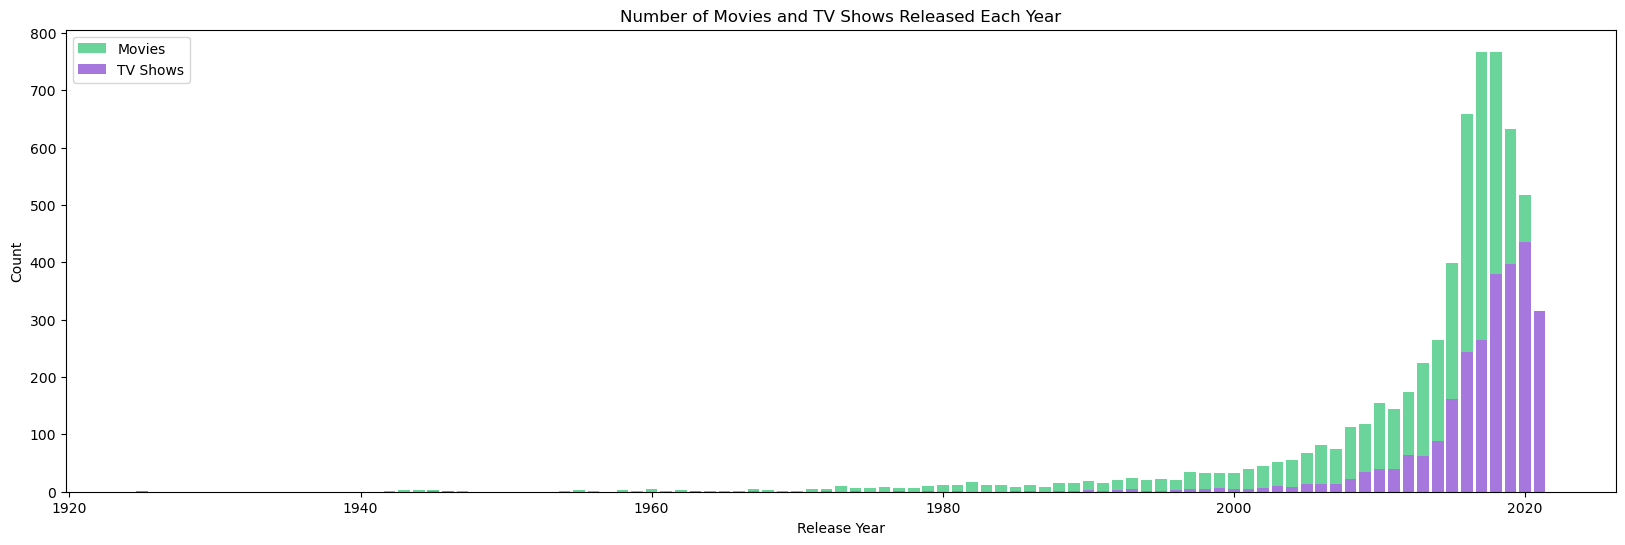

In [14]:
movies_df = df[df["type"] == "Movie"]
tv_shows_df = df[df["type"] == "TV Show"]

# Count the occurrences of each release year for movies and TV shows
vc_movies = movies_df["release_year"].value_counts().reset_index().rename(columns={"release_year": "count", "index": "release_year"})
vc_tv_shows = tv_shows_df["release_year"].value_counts().reset_index().rename(columns={"release_year": "count", "index": "release_year"})

plt.figure(figsize=(20, 6))

plt.bar(vc_movies["release_year"], vc_movies["count"], color="#6ad49b", label="Movies")
plt.bar(vc_tv_shows["release_year"], vc_tv_shows["count"], color="#a678de", label="TV Shows")

plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Number of Movies and TV Shows Released Each Year")
plt.legend()
plt.show()


<div class="alert alert-info">From the graph we can see that the content is regurly added to the wesite from the begining of 80'S</div>

In [15]:
country_counts = df['country'].value_counts()
top_countries = country_counts.head(10)

movies_df = df[df["type"] == "Movie"]
top_movies_country=movies_df['country'].value_counts()
top_movies_country=top_movies_country.head(10)

tv_shows_df = df[df["type"] == "TV Show"]
top_tvshow_df=tv_shows_df['country'].value_counts()
top_tvshow_df=top_tvshow_df.head(10)



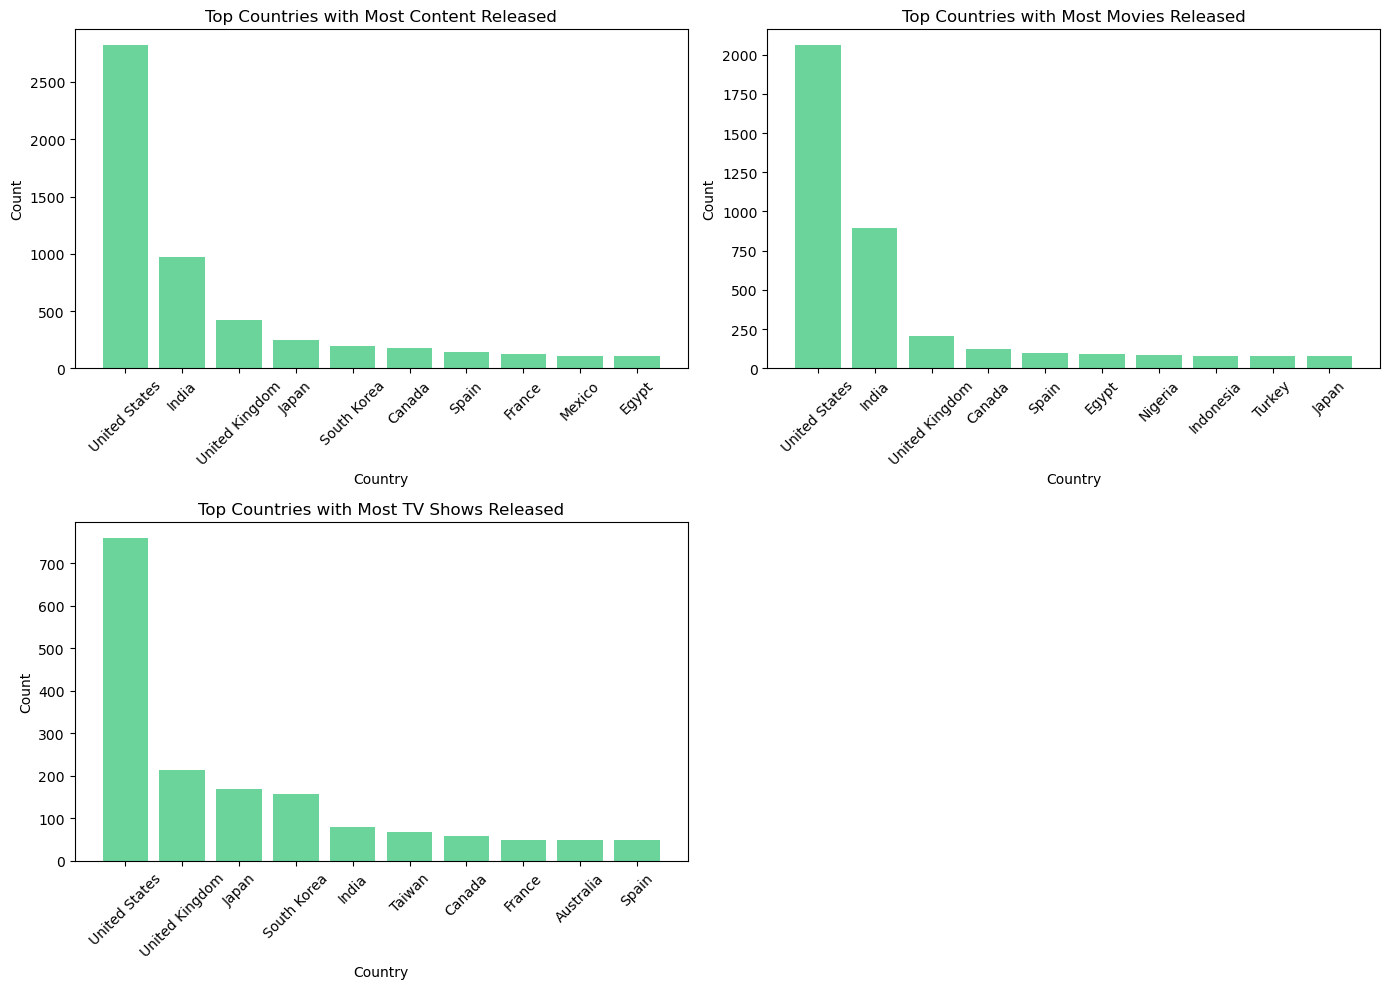

In [16]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].bar(top_countries.index, top_countries.values, color='#6ad49b')
axs[0, 0].set_title('Top Countries with Most Content Released')
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Count')
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].bar(top_movies_country.index, top_movies_country.values, color='#6ad49b')
axs[0, 1].set_title('Top Countries with Most Movies Released')
axs[0, 1].set_xlabel('Country')
axs[0, 1].set_ylabel('Count')
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].bar(top_tvshow_df.index, top_tvshow_df.values, color='#6ad49b')
axs[1, 0].set_title('Top Countries with Most TV Shows Released')
axs[1, 0].set_xlabel('Country')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


<div class="alert alert-info">We can see the the United states have high number of content in the Wesite compare to any other countries</div>

In [17]:
japan=df[df['country']=='Japan']
japan_movies = japan[japan['type'] == 'Movie']
japan_tv_shows = japan[japan['type'] == 'TV Show']

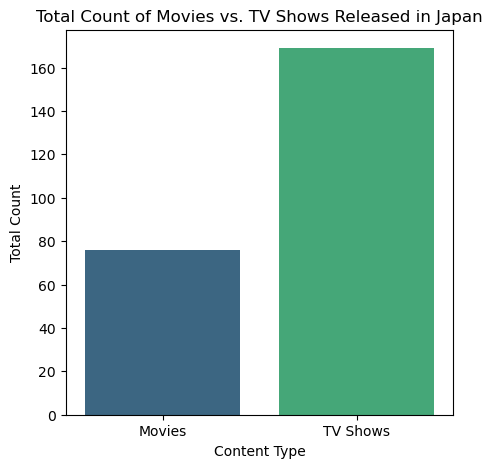

In [18]:
total_movies = japan_movies.shape[0]
total_tv_shows = japan_tv_shows.shape[0]

# Create a DataFrame for plotting
data = {
    'Type': ['Movies', 'TV Shows'],
    'Count': [total_movies, total_tv_shows]
}

# Create a grouped bar plot for comparing total counts of movies and TV shows
plt.figure(figsize=(5,5))
sns.barplot(x='Type', y='Count', data=data, palette='viridis')
plt.xlabel('Content Type')
plt.ylabel('Total Count')
plt.title('Total Count of Movies vs. TV Shows Released in Japan')

plt.show()

<div class="alert alert-info">We can see that the japanes makes more TV shows compared to Movies which is differnt from other countries</div>

In [19]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0


In [20]:
movies_df['duration'].head(5)

0      90 min
6      91 min
7     125 min
9     104 min
12    127 min
Name: duration, dtype: object

In [21]:
movies_df = movies_df.dropna(subset=['duration'])

movies_df['duration_A'] = movies_df['duration'].str.extract('(\d+)').astype(int)


In [22]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6128 non-null   object        
 1   type          6128 non-null   object        
 2   title         6128 non-null   object        
 3   director      5940 non-null   object        
 4   cast          5653 non-null   object        
 5   country       5688 non-null   object        
 6   date_added    6128 non-null   object        
 7   release_year  6128 non-null   int64         
 8   rating        6126 non-null   object        
 9   duration      6128 non-null   object        
 10  listed_in     6128 non-null   object        
 11  description   6128 non-null   object        
 12  date          6128 non-null   datetime64[ns]
 13  added_year    6128 non-null   float64       
 14  duration_A    6128 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int3

In [23]:
movies_df['duration_A'].skew()

0.2025791123063926

<Axes: xlabel='duration_A', ylabel='Count'>

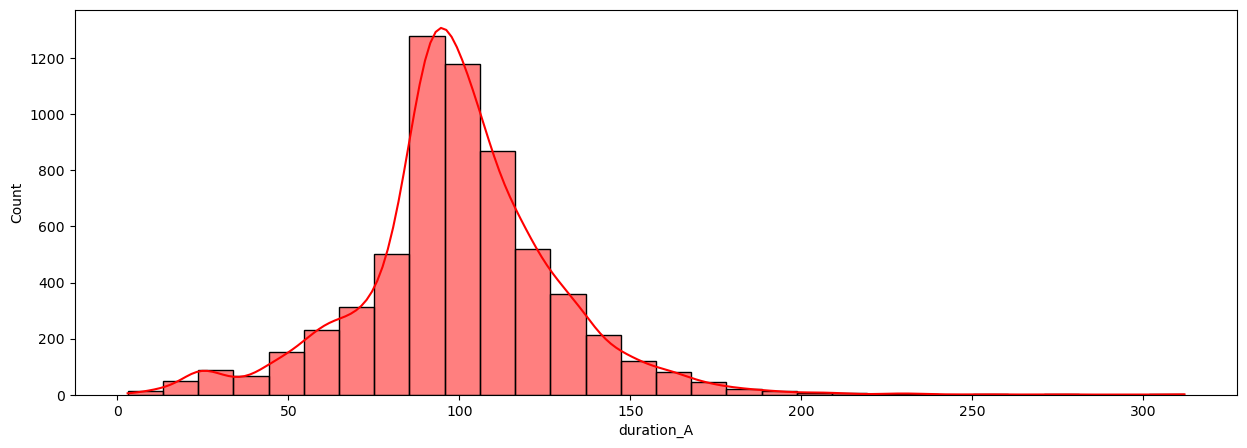

In [24]:
plt.figure(figsize=(15,5))
# Plotting the histogram with a specified color
sns.histplot(movies_df['duration_A'], kde=True, color='red', bins=30)


<div class="alert alert-info">We can see that most movies have the duration around 100 mins</div>

In [25]:
tv_shows_df['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

<Axes: xlabel='duration', ylabel='count'>

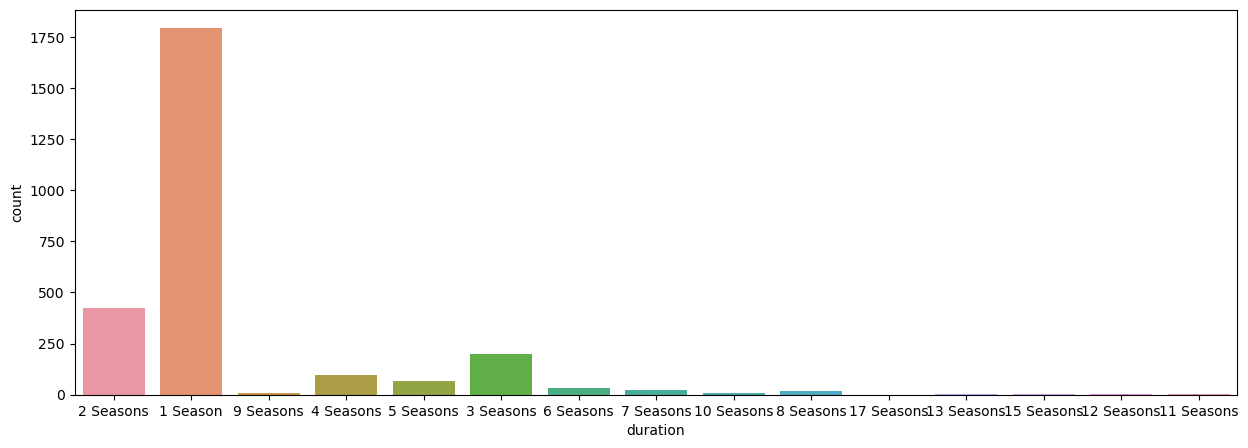

In [26]:
plt.figure(figsize=(15,5))

sns.countplot(x=tv_shows_df['duration'])

<div class="alert alert-info">We can see that the most TV shows are ended with 1 or 2 seasons</div>

In [27]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0


In [28]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [29]:
# Calculate the count of each unique rating
rating_counts = df['rating'].value_counts()

# Calculate the total number of ratings (excluding NaN values)
total_ratings = len(df['rating'].dropna())

# Calculate the percentage of each rating
rating_percentages = (rating_counts / total_ratings) * 100

# Print the percentage of each rating
print("Percentage of each rating present in the dataset:")
print(rating_percentages)


Percentage of each rating present in the dataset:
TV-MA       36.430762
TV-14       24.537090
TV-PG        9.803476
R            9.076451
PG-13        5.566284
TV-Y7        3.794161
TV-Y         3.487447
PG           3.260252
TV-G         2.499148
NR           0.908781
G            0.465750
TV-Y7-FV     0.068159
NC-17        0.034079
UR           0.034079
74 min       0.011360
84 min       0.011360
66 min       0.011360
Name: rating, dtype: float64


In [30]:
# Calculate the count of each unique rating
rating_counts = movies_df['rating'].value_counts()

# Calculate the total number of ratings (excluding NaN values)
total_ratings = len(movies_df['rating'].dropna())

# Calculate the percentage of each rating
rating_percentages = (rating_counts / total_ratings) * 100

# Print the percentage of each rating
print("Percentage of each rating present in the dataset:")
print(rating_percentages)

Percentage of each rating present in the dataset:
TV-MA       33.659811
TV-14       23.294156
R           13.010121
TV-PG        8.814887
PG-13        7.998694
PG           4.684949
TV-Y7        2.269017
TV-Y         2.138426
TV-G         2.056807
NR           1.224290
G            0.669278
TV-Y7-FV     0.081619
NC-17        0.048972
UR           0.048972
Name: rating, dtype: float64


In [31]:
# Calculate the count of each unique rating
rating_counts = tv_shows_df['rating'].value_counts()

# Calculate the total number of ratings (excluding NaN values)
total_ratings = len(tv_shows_df['rating'].dropna())

# Calculate the percentage of each rating
rating_percentages = (rating_counts / total_ratings) * 100

# Print the percentage of each rating
print("Percentage of each rating present in the dataset:")
print(rating_percentages)

Percentage of each rating present in the dataset:
TV-MA       42.819746
TV-14       27.412117
TV-PG       12.079282
TV-Y7        7.292446
TV-Y         6.581900
TV-G         3.515333
NR           0.186986
R            0.074794
TV-Y7-FV     0.037397
Name: rating, dtype: float64


<div class="alert alert-info">We can clearly see that the most content in the website is Matured content not for kids both in movies and TV shows <br> Compared to Movies TV have high percentage of Mature Audience which is for adults</div>

In [32]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0


In [33]:
type(df['listed_in'][1])

str

In [34]:
df['listed_in'].head(5)

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [35]:
df['listed_in'] = df['listed_in'].str.split(', ')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021-09-24,2021.0


In [36]:
df['listed_in'].head(5)

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: listed_in, dtype: object

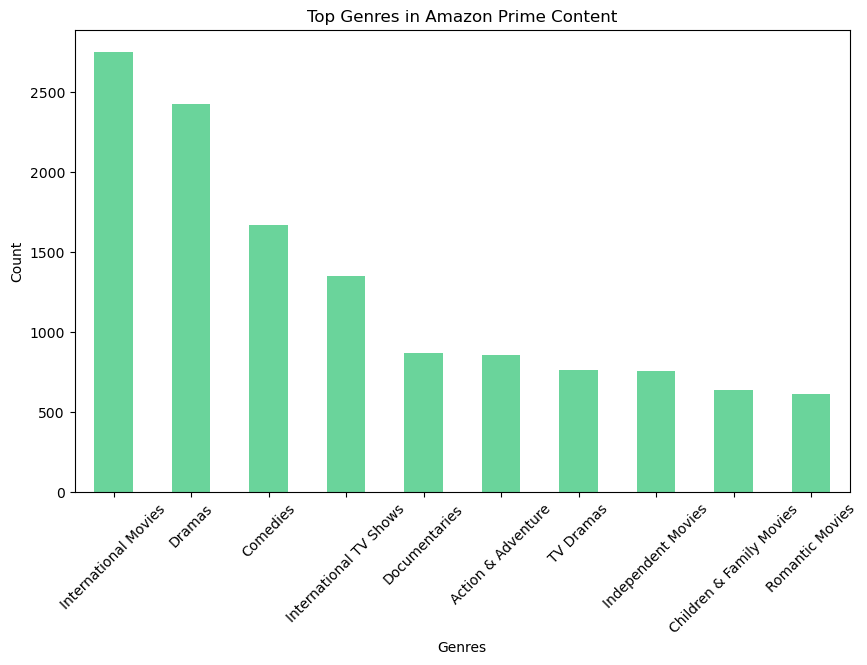

In [37]:
genre_counts = pd.Series([genre for sublist in df['listed_in'] for genre in sublist]).value_counts()
top_genres = genre_counts.head(10) 

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='#6ad49b')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top Genres in Amazon Prime Content')
plt.xticks(rotation=45)
plt.show()


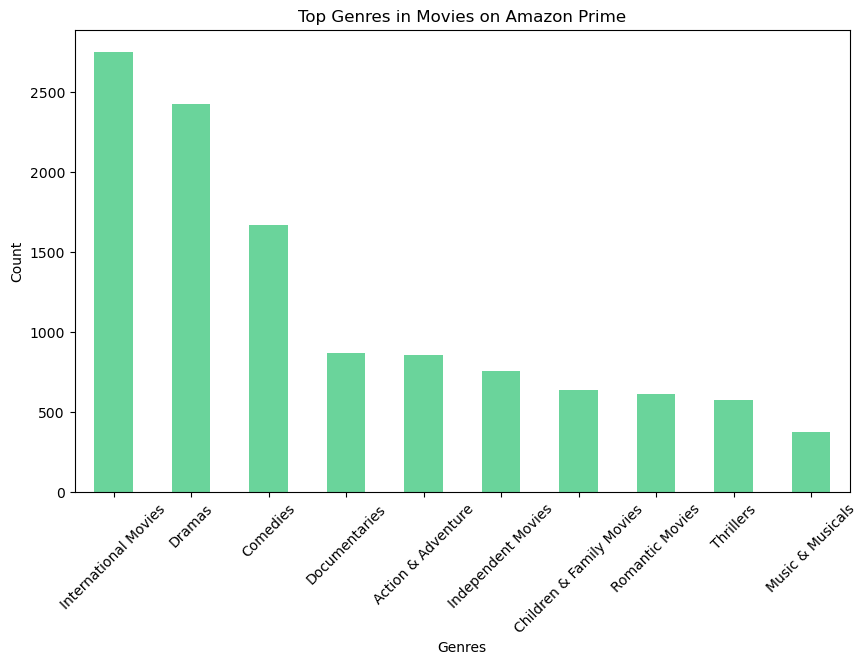

In [38]:
movies_df['listed_in'] = movies_df['listed_in'].str.split(', ')
genre_counts_movies = pd.Series([genre for sublist in movies_df['listed_in'] for genre in sublist]).value_counts()
top_genres_movies = genre_counts_movies.head(10)

plt.figure(figsize=(10, 6))
top_genres_movies.plot(kind='bar', color='#6ad49b')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top Genres in Movies on Amazon Prime')
plt.xticks(rotation=45)
plt.show()


C:\Users\91638\AppData\Local\Temp\ipykernel_9728\2033953245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['listed_in'] = tv_shows_df['listed_in'].str.split(', ')


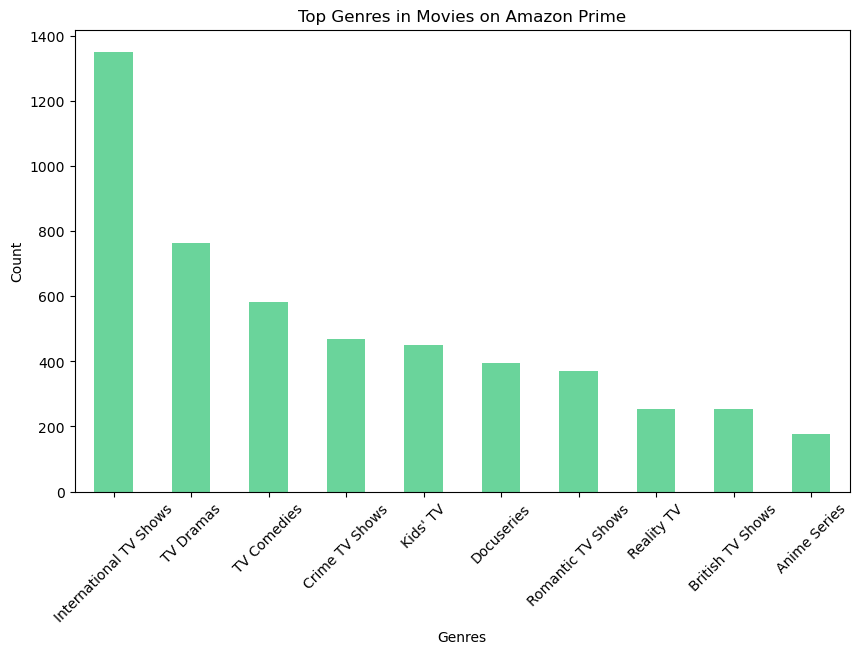

In [40]:
tv_shows_df['listed_in'] = tv_shows_df['listed_in'].str.split(', ')
genre_counts_movies = pd.Series([genre for sublist in tv_shows_df['listed_in'] for genre in sublist]).value_counts()
top_genres_movies = genre_counts_movies.head(10)

plt.figure(figsize=(10, 6))
top_genres_movies.plot(kind='bar', color='#6ad49b')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top Genres in Movies on Amazon Prime')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info">We can see that in both Movies and TV show The drama content is Most available</div>

In [43]:
sorted_df = df.sort_values(by='release_year', ascending=True)

In [55]:
sorted_df[['title', 'release_year','type','date_added']]

,title,release_year,type,date_added
4250,Pioneers: First Women Filmmakers*,1925,TV Show,"December 30, 2018"
7790,Prelude to War,1942,Movie,"March 31, 2017"
8205,The Battle of Midway,1942,Movie,"March 31, 2017"
8660,Undercover: How to Operate Behind Enemy Lines,1943,Movie,"March 31, 2017"
8739,Why We Fight: The Battle of Russia,1943,Movie,"March 31, 2017"
...,...,...,...,...
862,Special,2021,TV Show,"May 20, 2021"
861,Little Singham Future mein Satakli,2021,Movie,"May 20, 2021"
857,The Neighbor,2021,TV Show,"May 21, 2021"
876,Alma Matters,2021,TV Show,"May 14, 2021"


In [53]:
sortedr_df = df.sort_values(by='release_year', ascending=False)
sortedr_df[['title', 'release_year','type']]

,title,release_year,type
693,Ali & Ratu Ratu Queens,2021,Movie
781,Black Holes | The Edge of All We Know,2021,Movie
762,Sweet & Sour,2021,Movie
763,Sweet Tooth,2021,TV Show
764,Trippin' with the Kandasamys,2021,Movie
...,...,...,...
8660,Undercover: How to Operate Behind Enemy Lines,1943,Movie
8763,WWII: Report from the Aleutians,1943,Movie
8205,The Battle of Midway,1942,Movie
7790,Prelude to War,1942,Movie


In [54]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021-09-24,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2021-09-24,2021.0
